In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
from scipy.interpolate import interp1d

In [302]:
solution_online = pd.read_pickle('Sols/Solution_online_df_alpha-0.96-0.97-0.99-delta-0.95.pkl')
solution_offline = pd.read_pickle('Sols/Solution_offline_df_alpha-0.96-0.97-0.99-delta-0.95.pkl')

In [303]:
alpha_2_solution_online = pd.read_pickle('Sols/Solution_online_df_alpha-0.1-0.5-0.9-delta-0.95.pkl')
alpha_2_solution_offline = pd.read_pickle('Sols/Solution_offline_df_alpha-0.1-0.5-0.9-delta-0.95.pkl')

In [304]:
sol_online_list = solution_online.values.tolist()
sol_offline_list = solution_offline.values.tolist()

In [305]:
alpha_2_sol_online_list = alpha_2_solution_online.values.tolist()
alpha_2_sol_offline_list = alpha_2_solution_offline.values.tolist()

In [306]:
delta_value = 0.95
alpha_values = [0.96,0.97,0.99]

In [307]:
alpha_2_delta_value = 0.95
alpha_2_alpha_values = [0.1,0.5,0.9]

In [308]:
agent_types_df = agents_type_df = pd.read_pickle('data/agents_type.pkl')

In [309]:
age_group_day_online = np.zeros([3, 30], dtype = int)
age_group_day_ofline = np.zeros([3, 30], dtype = int)

for i in range(30):
    for j in range(10000):
        j_age = int(agent_types_df.iloc[j]['Age_group'])
        if sol_online_list[j][i]>-1:
            age_group_day_online[j_age][i] = age_group_day_online[j_age][i] +1
            
        if sol_offline_list[j][i]>-1:
            age_group_day_ofline[j_age][i] = age_group_day_ofline[j_age][i] +1


In [310]:
a2_age_group_day_online = np.zeros([3, 30], dtype = int)
a2_age_group_day_ofline = np.zeros([3, 30], dtype = int)

for i in range(30):
    for j in range(10000):
        j_age = int(agent_types_df.iloc[j]['Age_group'])
        if alpha_2_sol_online_list[j][i]>-1:
            a2_age_group_day_online[j_age][i] = a2_age_group_day_online[j_age][i] +1
            
        if alpha_2_sol_offline_list[j][i]>-1:
            a2_age_group_day_ofline[j_age][i] = a2_age_group_day_ofline[j_age][i] +1

In [338]:
diff_online = age_group_day_online - a2_age_group_day_online
diff_online

array([[  0,   0,   0,   0,   0,   0,   1,  -1,   4,   0,  -2,  -1, -14,
          0,   0,   0,   0,   4,   1,   1,   2,   2,   2,   2,   3,   4,
          0,   1,   0,   0],
       [  0,   0,   0,   0,   0,   0,  -1,   1,   0,   0,   0,   0,  13,
          0,   0,   0,   0,  -4,  -1,  -4,  -2,   0,  -1,   0,  -1,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   3,   0,  -2,  -1,   0,   0,   0,
          0,   0,   0,   0]])

In [340]:
[sum(diff_online[i]) for i in range(len(diff_online))]

[9, 0, 0]

In [342]:
diff_ofline = age_group_day_ofline - a2_age_group_day_ofline
diff_ofline

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  6,  0,  0,  0,
         0,  0,  0,  0,  0, -1, -1, -4,  0,  0,  0,  0,  0,  0],
       [ 0,  0, -6,  0,  0,  0,  6,  0,  0,  0,  0,  0, -6,  0,  0,  0,
         0,  0,  0,  0,  0,  1,  1,  4,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  6,  0,  0,  0, -6,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

In [343]:
[sum(diff_ofline[i]) for i in range(len(diff_ofline))]

[0, 0, 0]

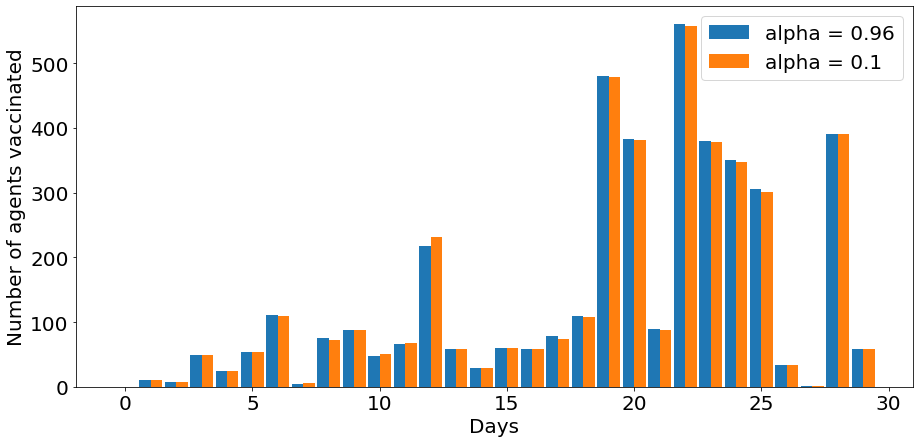

In [512]:
x = np.array([i for i in range(30)])
plt.rcParams.update({'font.size': 20})
# plt.figure(figsize=(80, 30))
width = 0.45  # the width of the bars
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(15)
rects1 = ax.bar(x - width/2, age_group_day_online[0], width, label='alpha = 0.96')
rects2 = ax.bar(x + width/2, a2_age_group_day_online[0], width, label='alpha = 0.1')
ax.set_ylabel('Number of agents vaccinated',fontsize=20)
ax.set_xlabel('Days',fontsize=20)
# ax.set_xticks(x, labels)
ax.legend()
plt.show()
fig.savefig('age_0_compare_alphas.png')

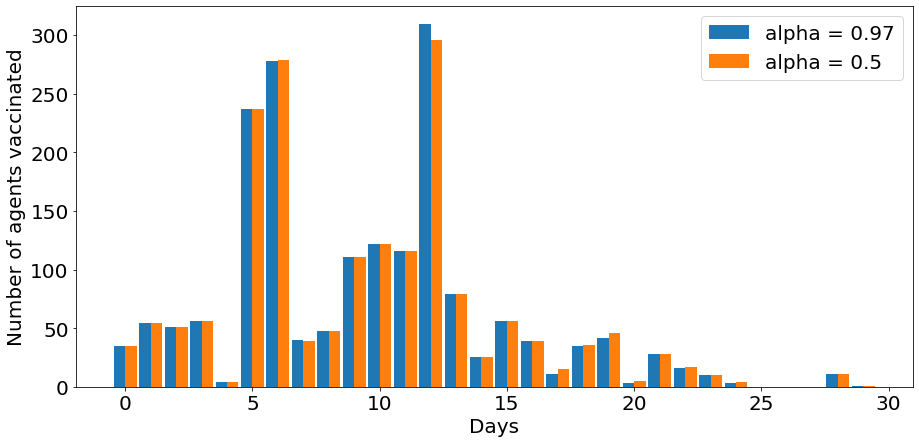

In [513]:
x = np.array([i for i in range(30)])
# plt.figure(figsize=(80, 30))
width = 0.45  # the width of the bars
plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(15)
rects1 = ax.bar(x - width/2, age_group_day_online[1], width, label='alpha = 0.97')
rects2 = ax.bar(x + width/2, a2_age_group_day_online[1], width, label='alpha = 0.5')
ax.set_ylabel('Number of agents vaccinated',fontsize=20)
ax.set_xlabel('Days',fontsize=20)
# ax.set_xticks(x, labels)
ax.legend()
plt.show()
fig.savefig('age_1_compare_alphas.png')

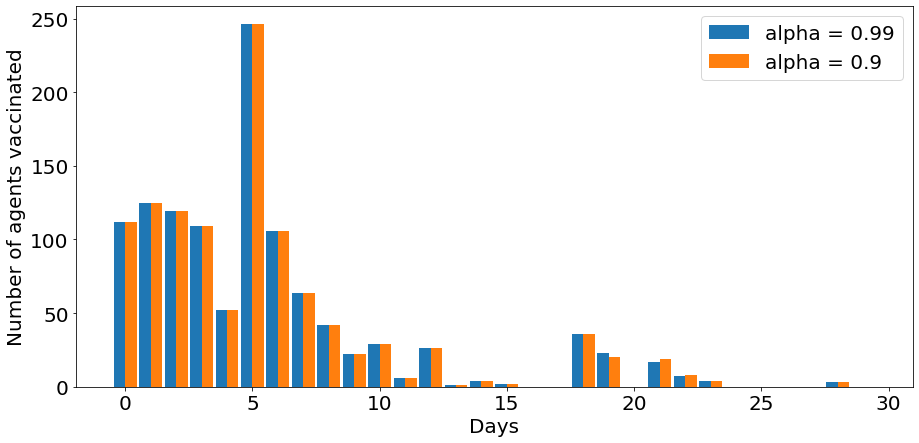

In [514]:
x = np.array([i for i in range(30)])
# plt.figure(figsize=(80, 30))
plt.rcParams.update({'font.size': 20})
width = 0.45  # the width of the bars
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(15)
rects1 = ax.bar(x - width/2, age_group_day_online[2], width, label='alpha = 0.99')
rects2 = ax.bar(x + width/2, a2_age_group_day_online[2], width, label='alpha = 0.9')
ax.set_ylabel('Number of agents vaccinated',fontsize=20)
ax.set_xlabel('Days',fontsize=20)
# ax.set_xticks(x,fontsize=20)
ax.legend()
plt.show()
fig.savefig('age_2_compare_alphas.png')
plt.close(fig)

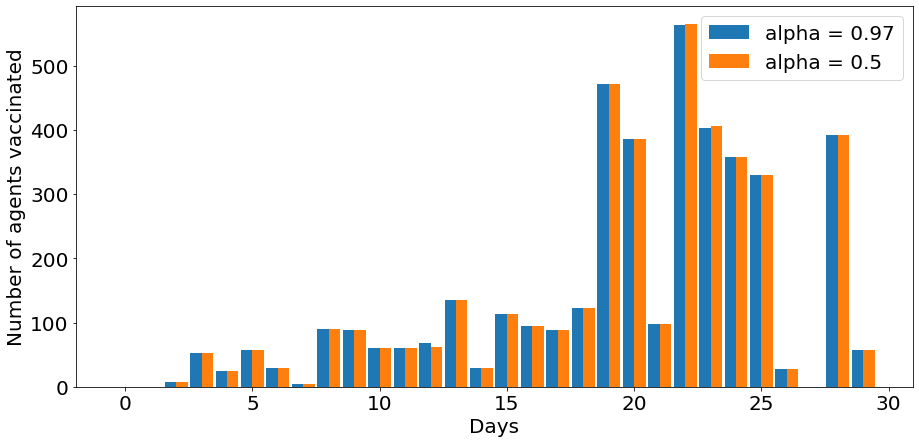

In [517]:
x = np.array([i for i in range(30)])
# plt.figure(figsize=(80, 30))
width = 0.45  # the width of the bars
plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(15)
rects1 = ax.bar(x - width/2, age_group_day_ofline[0], width, label='alpha = 0.97')
rects2 = ax.bar(x + width/2, a2_age_group_day_ofline[0], width, label='alpha = 0.5')
ax.set_ylabel('Number of agents vaccinated',fontsize=20)
ax.set_xlabel('Days',fontsize=20)
# ax.set_xticks(x, labels)
ax.legend()
plt.show()
fig.savefig('age_0_compare_alphas_offline.png')

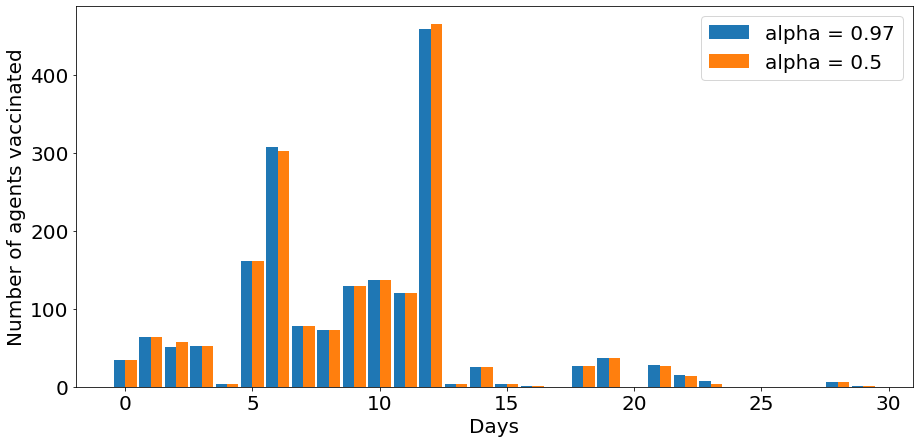

In [518]:
x = np.array([i for i in range(30)])
# plt.figure(figsize=(80, 30))
width = 0.45  # the width of the bars
plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(15)
rects1 = ax.bar(x - width/2, age_group_day_ofline[1], width, label='alpha = 0.97')
rects2 = ax.bar(x + width/2, a2_age_group_day_ofline[1], width, label='alpha = 0.5')
ax.set_ylabel('Number of agents vaccinated',fontsize=20)
ax.set_xlabel('Days',fontsize=20)
# ax.set_xticks(x, labels)
ax.legend()
plt.show()
fig.savefig('age_1_compare_alphas_offline.png')

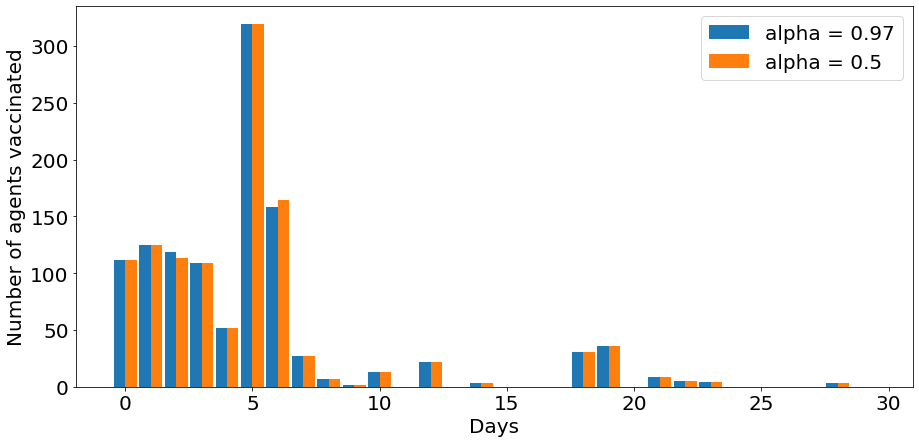

In [519]:
x = np.array([i for i in range(30)])
# plt.figure(figsize=(80, 30))
width = 0.45  # the width of the bars
plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(15)
rects1 = ax.bar(x - width/2, age_group_day_ofline[2], width, label='alpha = 0.97')
rects2 = ax.bar(x + width/2, a2_age_group_day_ofline[2], width, label='alpha = 0.5')
ax.set_ylabel('Number of agents vaccinated',fontsize=20)
ax.set_xlabel('Days',fontsize=20)
# ax.set_xticks(x, labels)
ax.legend()
plt.show()
fig.savefig('age_2_compare_alphas_offline.png')

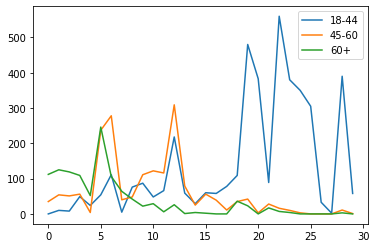

In [112]:
# plt.figure(figsize=(8, 4))
# plt.bar(x, age_group_day_online[0], width=1, label = '18-44',alpha=0.7)
plt.plot(x, age_group_day_online[0], label = '18-44')
# plt.bar(x, age_group_day_online[1], width=1, label = '45-60',alpha=0.7)
plt.plot(x, age_group_day_online[1], label = '45-60')
# plt.bar(x, age_group_day_online[2], width=1, label = '60+',alpha=0.7)
plt.plot(x, age_group_day_online[2], label = '60+')
plt.legend(['18-44','45-60','60+']);
# age_group_day_online

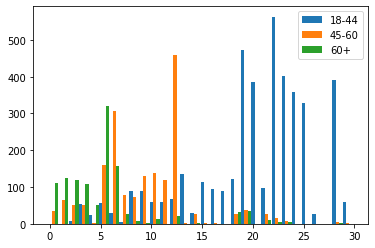

In [292]:
plt.bar(x +0.0, age_group_day_ofline[0], width=0.33, label = '18-44')
plt.bar(x +0.33, age_group_day_ofline[1], width=0.33, label = '45-60')
plt.bar(x +0.66, age_group_day_ofline[2], width=0.33, label = '60+')
plt.legend(['18-44','45-60','60+']);
# age_group_day_ofline

In [114]:
cumulative_age_group_day_online = copy.deepcopy(age_group_day_online)
cumulative_age_group_day_ofline = copy.deepcopy(age_group_day_ofline)

In [115]:
for i in range(3):
    for j in range(29):
        cumulative_age_group_day_online[i][j+1] = cumulative_age_group_day_online[i][j+1] + cumulative_age_group_day_online[i][j]
        cumulative_age_group_day_ofline[i][j+1] = cumulative_age_group_day_ofline[i][j+1] + cumulative_age_group_day_ofline[i][j]

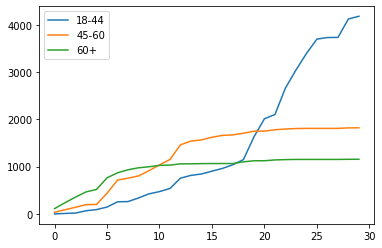

In [116]:
plt.plot(x, cumulative_age_group_day_online[0], label = '18-44')
plt.plot(x, cumulative_age_group_day_online[1], label = '45-60')
plt.plot(x, cumulative_age_group_day_online[2], label = '60+')
plt.legend(['18-44','45-60','60+']);

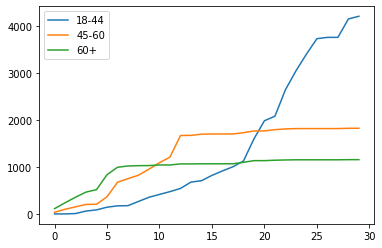

In [117]:
plt.plot(x, cumulative_age_group_day_ofline[0], label = '18-44')
plt.plot(x, cumulative_age_group_day_ofline[1], label = '45-60')
plt.plot(x, cumulative_age_group_day_ofline[2], label = '60+')
plt.legend(['18-44','45-60','60+']);

In [118]:
# # 300 represents number of points to make between T.min and T.max
# xnew = np.linspace(x.min(), x.max(), 300)  

# smooth_0 = spline(x, cumulative_age_group_day_online[0], xnew)
# smooth_1 = spline(x, cumulative_age_group_day_online[1], xnew)
# smooth_2 = spline(x, cumulative_age_group_day_online[2], xnew)

# plt.plot(xnew,smooth_0, label = '18-44')
# plt.plot(xnew,smooth_1, label = '45-60')
# plt.plot(xnew,smooth_2, label = '60+')
# plt.legend(['18-44','45-60','60+']);
# plt.show()

In [119]:
#importing agents data
availability_df = pd.read_pickle('data/availability_df.pkl')
belongingness_df = pd.read_pickle('data/belongingness_df.pkl')

#importing hospitals data
daily_supply_df = pd.read_pickle('data/daily_supply.pkl')
overall_quota_df = pd.read_pickle('data/overall_quota.pkl')
Hospital_Data_Chennai_May_2022_df = pd.read_pickle('data/Hospital_Data_Chennai_May_2022.pkl')

In [167]:
ratio_age_group_day_online = [[0.0 for i in range(30)] for j in range(3)]
ratio_age_group_day_ofline = [[0.0 for i in range(30)] for j in range(3)]

In [168]:
for j in range(30):
    col = [age_group_day_online[i][j] for i in range(3)]
    day_total = sum(col)
#     print(col,"->",day_total)
    for i in range(3):
        if day_total == 0:
            ratio_age_group_day_online[i][j] = 0.0
        else:
            ratio_age_group_day_online[i][j] = age_group_day_online[i][j]/day_total

In [169]:
for j in range(30):
    col = [age_group_day_ofline[i][j] for i in range(3)]
    day_total = sum(col)
#     print(col,"->",day_total)
    for i in range(3):
        if day_total == 0:
            ratio_age_group_day_ofline[i][j] = 0.0
        else:
            ratio_age_group_day_ofline[i][j] = age_group_day_ofline[i][j]/day_total

In [173]:
np.matrix(ratio_age_group_day_ofline)

matrix([[0.        , 0.        , 0.04494382, 0.24766355, 0.3125    ,
         0.10614525, 0.05858586, 0.03669725, 0.52941176, 0.40454545,
         0.28571429, 0.33333333, 0.12386157, 0.97826087, 0.5       ,
         0.97435897, 0.98958333, 1.        , 0.67777778, 0.86605505,
         1.        , 0.7238806 , 0.96569468, 0.97101449, 1.        ,
         1.        , 1.        , 0.        , 0.97755611, 0.98305085],
        [0.23809524, 0.33862434, 0.28651685, 0.24299065, 0.0375    ,
         0.29981378, 0.62222222, 0.71559633, 0.42941176, 0.58636364,
         0.65238095, 0.66666667, 0.83606557, 0.02173913, 0.44827586,
         0.02564103, 0.01041667, 0.        , 0.15      , 0.06788991,
         0.        , 0.20895522, 0.02572899, 0.01932367, 0.        ,
         0.        , 0.        , 0.        , 0.01496259, 0.01694915],
        [0.76190476, 0.66137566, 0.66853933, 0.50934579, 0.65      ,
         0.59404097, 0.31919192, 0.24770642, 0.04117647, 0.00909091,
         0.06190476, 0.        ,

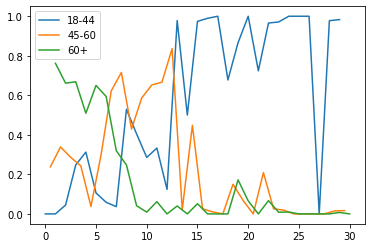

In [176]:
plt.plot(x +0.0, ratio_age_group_day_ofline[0], label = '18-44')
plt.plot(x +0.5, ratio_age_group_day_ofline[1], label = '45-60')
plt.plot(x +1, ratio_age_group_day_ofline[2],  label = '60+')
plt.legend(['18-44','45-60','60+']);

In [183]:
Hospital_Data_Chennai_May_2022_df

,Date,Zip_Code,Center_ID,Center_Name,Total_available_capacity
0,01-05-2022,600034,603898,Kanchi Kamakoti Child Trust,9
1,01-05-2022,600089,617607,Srushti Hospital Pvt Ltd,86
3,01-05-2022,600116,855907,Srushti Clinic Porur,52
5,02-05-2022,600037,604136,MMRV Hospital,19
6,02-05-2022,600085,1037942,Srushti Hospital Kottupuram,29
...,...,...,...,...,...
162,30-05-2022,600089,617607,Srushti Hospital Pvt Ltd,58
164,30-05-2022,600093,580753,Sooriya Hospital,74
165,31-05-2022,600024,580742,Medway Hospitals,59
166,31-05-2022,600089,617607,Srushti Hospital Pvt Ltd,59


In [184]:
dict_Q_cxd = dict(zip(zip(Hospital_Data_Chennai_May_2022_df.Date, Hospital_Data_Chennai_May_2022_df.Center_ID),Hospital_Data_Chennai_May_2022_df.Total_available_capacity))
# dict_Q_cxd

In [192]:
categories = overall_quota_df['Center_ID'].values.tolist()
days = daily_supply_df['Date'].values.tolist()


In [193]:
Q_cxd = []
for cat in categories:
    c_d = []
    for day in days:
        if (day,cat) in dict_Q_cxd:
            c_d.append(dict_Q_cxd[(day,cat)])
        else:
            c_d.append(0)
    Q_cxd.append(c_d)

In [213]:
d_dxc = {}
for i in range(len(days)):
    for j in range(len(categories)):
        if (days[i],categories[j]) in dict_Q_cxd and dict_Q_cxd[(days[i],categories[j])] !=0:
            d_dxc[(i,j)] = dict_Q_cxd[(days[i],categories[j])]

In [228]:
dict_list_of_cats = {i:[] for i in range(10000)}
for i in range(10000):
    for j in range(len(categories)):
        if belongingness_df.iloc[i][categories[j]] == 1:
            dict_list_of_cats[i].append(j)

In [268]:
availability_list = availability_df.values.tolist()

In [278]:
can_be_vaccinated_axd = np.zeros((10000,30), dtype=int)
for i in range(10000):
    for j in range(30):
        if availability_list[i][j] == 1:
            i_categories = dict_list_of_cats[i]
            possible_vaccination = 0
            for c in i_categories:
                if (j,c) in d_dxc:
                    possible_vaccination = 1
            can_be_vaccinated_axd[i][j] = possible_vaccination

In [279]:
can_be_vaccinated_axd

array([[0, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 1, 1],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 1],
       [1, 0, 1, ..., 0, 0, 1]])

In [280]:
can_be_vaccinated_untill_now_axd = copy.deepcopy(can_be_vaccinated_axd)
for i in range(10000):
    for j in range(29):
        if can_be_vaccinated_untill_now_axd[i][j+1] !=1:
            can_be_vaccinated_untill_now_axd[i][j+1] = can_be_vaccinated_untill_now_axd[i][j]

In [281]:
possible_vaccination_age_group_day = np.zeros([3, 30], dtype = int)

for i in range(10000):
    for j in range(30):
        i_age = int(agent_types_df.iloc[i]['Age_group'])
        possible_vaccination_age_group_day[i_age][j] = possible_vaccination_age_group_day[i_age][j] + can_be_vaccinated_untill_now_axd[i][j]

In [282]:
possible_vaccination_age_group_day

array([[1766, 3365, 4103, 5047, 5346, 5853, 5976, 6091, 6126, 6144, 6212,
        6218, 6323, 6325, 6353, 6354, 6354, 6354, 6544, 6607, 6607, 6644,
        6661, 6671, 6671, 6671, 6671, 6671, 6686, 6686],
       [ 554, 1024, 1249, 1523, 1605, 1765, 1799, 1838, 1850, 1854, 1875,
        1877, 1899, 1899, 1907, 1907, 1907, 1907, 1971, 1986, 1986, 1997,
        2003, 2005, 2005, 2005, 2005, 2005, 2011, 2012],
       [ 312,  607,  729,  881,  940, 1020, 1040, 1058, 1065, 1067, 1072,
        1072, 1094, 1094, 1097, 1097, 1097, 1097, 1151, 1164, 1164, 1173,
        1178, 1182, 1182, 1182, 1182, 1182, 1185, 1185]])

In [293]:
cumulative_age_group_day_ofline 

array([[   0,    0,    8,   61,   86,  143,  172,  176,  266,  355,  415,
         475,  543,  678,  707,  821,  916, 1005, 1127, 1599, 1985, 2082,
        2645, 3047, 3404, 3733, 3761, 3761, 4153, 4211],
       [  35,   99,  150,  202,  205,  366,  674,  752,  825,  954, 1091,
        1211, 1670, 1673, 1699, 1702, 1703, 1703, 1730, 1767, 1767, 1795,
        1810, 1818, 1818, 1818, 1818, 1818, 1824, 1825],
       [ 112,  237,  356,  465,  517,  836,  994, 1021, 1028, 1030, 1043,
        1043, 1065, 1065, 1068, 1068, 1068, 1068, 1099, 1135, 1135, 1144,
        1149, 1153, 1153, 1153, 1153, 1153, 1156, 1156]])

In [296]:
online_one_minus_ratio = np.zeros([3, 30])
ofline_one_minus_ratio = np.zeros([3, 30])
for i in range(3):
    for j in range(30):
        online_one_minus_ratio[i][j] = 1 - (cumulative_age_group_day_online[i][j]/possible_vaccination_age_group_day[i][j])
        ofline_one_minus_ratio[i][j] = 1 - (cumulative_age_group_day_ofline[i][j]/possible_vaccination_age_group_day[i][j])

In [413]:
# at_50_persent = np.empty(30)
# at_50_persent.fill(0.5)
# at_90 = np.empty(30)
# at_90.fill(0.1)

# g0on_idx_50 = np.argwhere(np.diff(np.sign(online_one_minus_ratio[0]- at_50_persent))).flatten()
# g1on_idx_50 = np.argwhere(np.diff(np.sign(online_one_minus_ratio[1]- at_50_persent))).flatten()
# g2on_idx_50 = np.argwhere(np.diff(np.sign(online_one_minus_ratio[2]- at_50_persent))).flatten()

# print(g0on_idx_50, g1on_idx_50, g2on_idx_50)

# # g0off_idx_50 = np.argwhere(np.diff(np.sign(ofline_one_minus_ratio[0]- at_50_persent))).flatten()
# # g1off_idx_50 = np.argwhere(np.diff(np.sign(ofline_one_minus_ratio[1]- at_50_persent))).flatten()
# # g2off_idx_50 = np.argwhere(np.diff(np.sign(ofline_one_minus_ratio[2]- at_50_persent))).flatten()


# # g0on_idx_90 = np.argwhere(np.diff(np.sign(online_one_minus_ratio[0]- at_90))).flatten()
# # g1on_idx_90 = np.argwhere(np.diff(np.sign(online_one_minus_ratio[1]- at_90))).flatten()
# # g2on_idx_90 = np.argwhere(np.diff(np.sign(online_one_minus_ratio[2]- at_90))).flatten()

# # g0off_idx_90 = np.argwhere(np.diff(np.sign(ofline_one_minus_ratio[0]- at_90))).flatten()
# # g1off_idx_90 = np.argwhere(np.diff(np.sign(ofline_one_minus_ratio[1]- at_90))).flatten()
# # g2off_idx_90 = np.argwhere(np.diff(np.sign(ofline_one_minus_ratio[2]- at_90))).flatten()

[23] [9] [2]


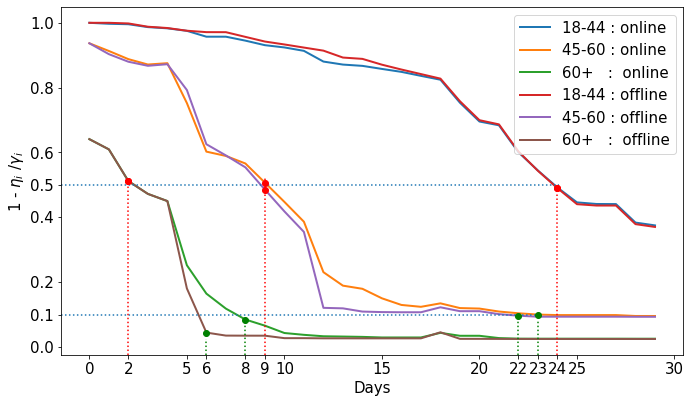

In [515]:
plt.figure(figsize=(10,6), tight_layout=True)
#plotting
plt.plot(x, online_one_minus_ratio[0],'-', linewidth=2, label = '18-44-on')
plt.plot(x, online_one_minus_ratio[1],'-', linewidth=2, label = '45-60-on')
plt.plot(x, online_one_minus_ratio[2],'-', linewidth=2,  label = '60+-on')

plt.plot(x, ofline_one_minus_ratio[0],'-', linewidth=2, label = '18-44-off')
plt.plot(x, ofline_one_minus_ratio[1],'-', linewidth=2, label = '45-60-off')
plt.plot(x, ofline_one_minus_ratio[2],'-', linewidth=2,  label = '60+-off')

plt.axhline(y = 0.5, xmax = 24/30, linestyle = ':') 
plt.axhline(y = 0.1, xmax = 23/30, linestyle = ':') 
 

plt.plot(x[24], online_one_minus_ratio[0][24], 'ro')
plt.axvline(x = 24, ymax=online_one_minus_ratio[0][24], linestyle = ':', color='red')
plt.plot(x[9], online_one_minus_ratio[1][9], 'ro')
plt.axvline(x = 9, ymax=online_one_minus_ratio[1][9], linestyle = ':', color='red')
plt.plot(x[2], online_one_minus_ratio[2][2], 'ro')
plt.axvline(x = 2, ymax=online_one_minus_ratio[2][2], linestyle = ':', color='red')

plt.plot(x[24], ofline_one_minus_ratio[0][24], 'ro')
# plt.axvline(x = 6, ymax=ofline_one_minus_ratio[2][6], linestyle = ':', color='red')
plt.plot(x[9], ofline_one_minus_ratio[1][9], 'ro')
# plt.axvline(x = 6, ymax=ofline_one_minus_ratio[2][6], linestyle = ':', color='red')
plt.plot(x[2], ofline_one_minus_ratio[2][2], 'ro')
# plt.axvline(x = 6, ymax=ofline_one_minus_ratio[2][6], linestyle = ':', color='red')

plt.plot(x[23], online_one_minus_ratio[1][23], 'go')
plt.axvline(x = 23, ymax=online_one_minus_ratio[1][23], linestyle = ':', color='green')
plt.plot(x[8], online_one_minus_ratio[2][8], 'go')
plt.axvline(x = 8, ymax=online_one_minus_ratio[2][8], linestyle = ':', color='green')

plt.plot(x[22], ofline_one_minus_ratio[1][22], 'go')
plt.axvline(x = 22, ymax=ofline_one_minus_ratio[1][22], linestyle = ':', color='green')
plt.plot(x[6], ofline_one_minus_ratio[2][6], 'go')
plt.axvline(x = 6, ymax=ofline_one_minus_ratio[2][6], linestyle = ':', color='green')

#customization
plt.yticks([0.0, 0.1, 0.2,0.4,0.5,0.6,0.8,1.0],fontsize=15)
plt.xticks([0,2,5,6,8,9,10,15,20,22,23,24,25,30],fontsize=15)
plt.xlabel('Days',fontsize=15)
plt.ylabel('1 - ${\eta_i\ / \gamma_i}$',fontsize=15)
# plt.title('Some Title')
plt.legend(labels=['18-44 : online','45-60 : online','60+   :  online','18-44 : offline','45-60 : offline','60+   :  offline'],fontsize=15)
# plt.show()
plt.savefig('final_compare.png')
plt.show()

In [378]:
online_one_minus_ratio

array([[1.        , 0.99702823, 0.99561297, 0.98672479, 0.98297793,
        0.97522638, 0.95716198, 0.95714989, 0.94498857, 0.93098958,
        0.92401803, 0.913477  , 0.8804365 , 0.87114625, 0.86714938,
        0.85772742, 0.84859931, 0.83632358, 0.82441932, 0.75344332,
        0.6954745 , 0.68377483, 0.60051043, 0.5441463 , 0.49168041,
        0.44596013, 0.44101334, 0.44071354, 0.38363745, 0.37496261],
       [0.9368231 , 0.91308594, 0.88791033, 0.87130663, 0.87538941,
        0.75240793, 0.60255698, 0.58922742, 0.56594595, 0.50701187,
        0.44746667, 0.38625466, 0.23064771, 0.18904687, 0.17933928,
        0.14997378, 0.12952281, 0.12375459, 0.13444952, 0.11983887,
        0.1183283 , 0.10916375, 0.10384423, 0.09975062, 0.09825436,
        0.09825436, 0.09825436, 0.09825436, 0.09547489, 0.09542744],
       [0.64102564, 0.60955519, 0.51165981, 0.47219069, 0.45      ,
        0.25196078, 0.16442308, 0.11814745, 0.08450704, 0.0656045 ,
        0.04291045, 0.03731343, 0.03290676, 0.

In [412]:
ofline_one_minus_ratio

array([[1.        , 1.        , 0.99805021, 0.98791361, 0.98391321,
        0.97556808, 0.97121821, 0.97110491, 0.95657852, 0.94222005,
        0.93319382, 0.92360888, 0.91412304, 0.89280632, 0.88871399,
        0.87079005, 0.85583884, 0.84183192, 0.82778117, 0.75798396,
        0.69956107, 0.68663456, 0.60291248, 0.54324689, 0.48973167,
        0.44041373, 0.43621646, 0.43621646, 0.37885133, 0.37017649],
       [0.9368231 , 0.90332031, 0.87990392, 0.86736704, 0.87227414,
        0.79263456, 0.62534742, 0.59085963, 0.55405405, 0.48543689,
        0.41813333, 0.35482152, 0.12058978, 0.11901001, 0.10907184,
        0.10749869, 0.10697431, 0.10697431, 0.12227296, 0.1102719 ,
        0.1102719 , 0.10115173, 0.09635547, 0.09326683, 0.09326683,
        0.09326683, 0.09326683, 0.09326683, 0.09298856, 0.09294235],
       [0.64102564, 0.60955519, 0.51165981, 0.47219069, 0.45      ,
        0.18039216, 0.04423077, 0.03497164, 0.03474178, 0.03467666,
        0.02705224, 0.02705224, 0.02650823, 0.